In [1]:
# for manupilating the data
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# settings
%matplotlib inline


pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn")

<h1 style="color:#36454F">Take a look at the data</h1>

In [2]:
# let's get the data
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The min valus of columns Glucose, BloodPressure, Skin Thickness, Insulin and BMI cann't be zero.<br>
I will replace them with the median if they are a lot.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No NULL Values in the data..

In [8]:
df.duplicated().sum()

0

NO Duplicated Values in the data..

In [9]:
df.corr()["Outcome"].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

I think we should search if there was any outliers in the data..

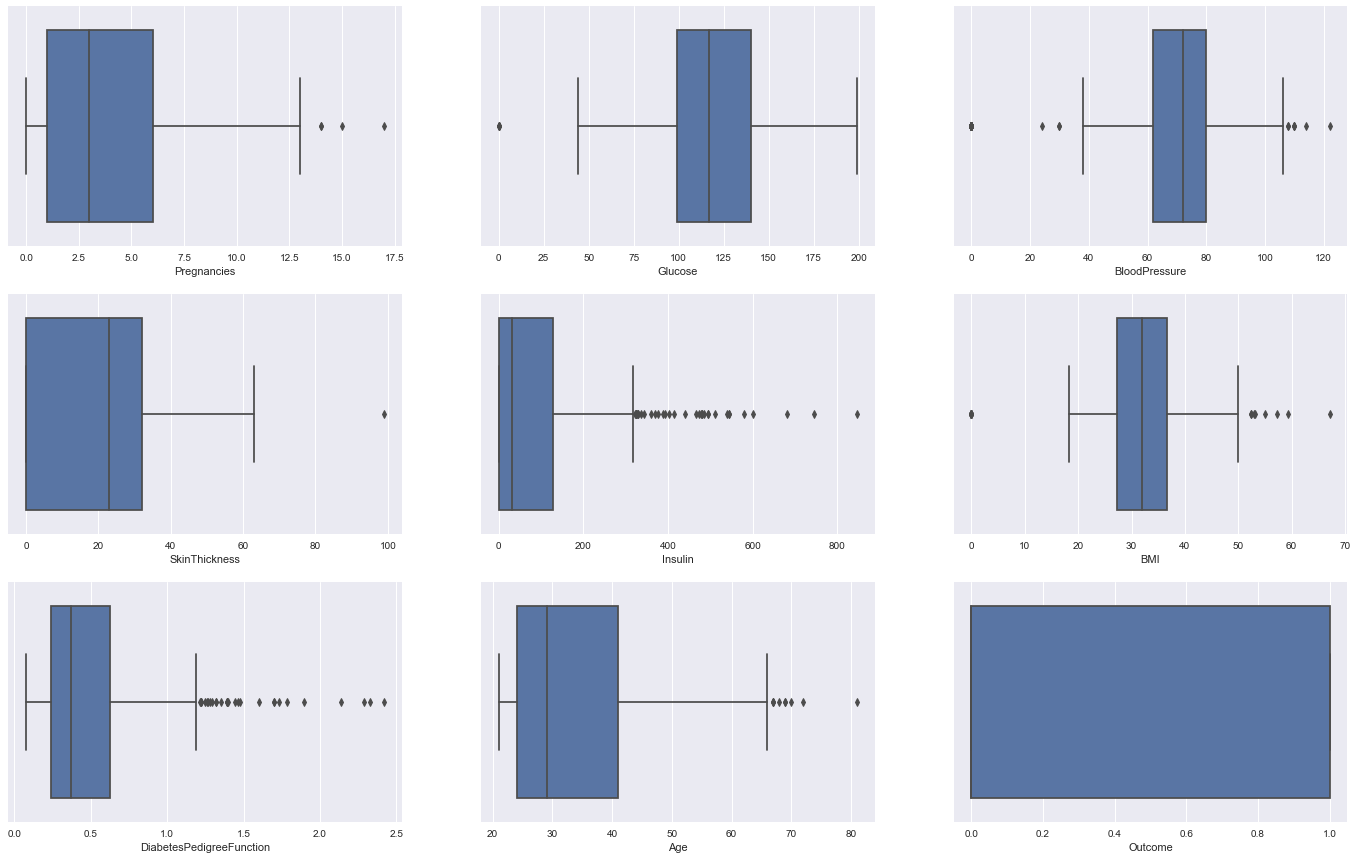

In [10]:
fig, ax = plt.subplots(3, 3, figsize = (24, 15))
for i, column in enumerate(df.columns):
    sns.boxplot(data = df, x = column,ax = ax[(i // 3), i - (i // 3) * 3])
    

We Can see that our data is full of outliers!!

In [11]:
# let's see how many outliers are in every column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

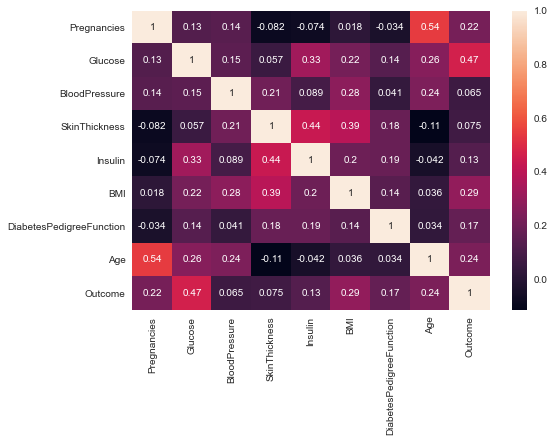

In [12]:
sns.heatmap(df.corr(), annot = True)
plt.show()

<h1 style="color:#36454F">Data Cleaning</h1>

> - No null values.
> - No duplicated entries.
> - Lots of Outliers.
> - min values of some columns need to be looked at.


In [13]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    print(f"Number of zeros for column {col} is: {df[col].value_counts()[0]}")


Number of zeros for column Glucose is: 5
Number of zeros for column BloodPressure is: 35
Number of zeros for column SkinThickness is: 227
Number of zeros for column Insulin is: 374
Number of zeros for column BMI is: 11


They are a lot I will replace them with the median.


In [14]:
for col in cols:
    col_median = df[col].median()
    df.loc[df[col] == 0, col] = col_median

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               1.223057
Insulin                     2.693181
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

I will first try to replace outliers with the median and see how this changes the skew of the data

In [17]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df.loc[(df[col] < (q1 - 1.5 * iqr)), col] = (q1 - 1.5 * iqr)
    df.loc[(df[col] > (q3 + 1.5 * iqr)), col] = (q3 + 1.5 * iqr)


That really helped the skew of the data.

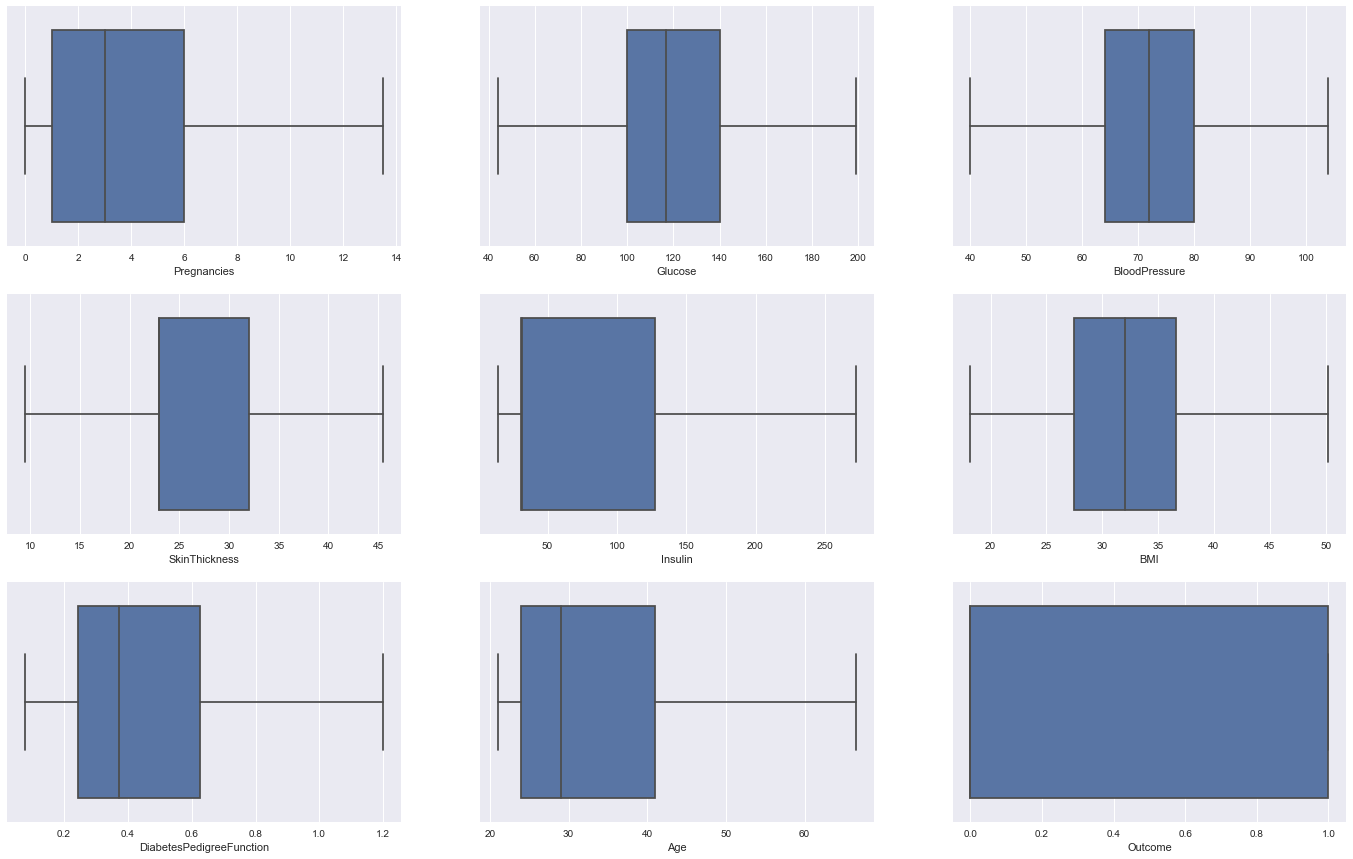

In [18]:
fig, ax = plt.subplots(3, 3, figsize = (24, 15))
for i, column in enumerate(df.columns):
    sns.boxplot(data = df, x = column,ax = ax[(i // 3), i - (i // 3) * 3])

<h1 style = "color: #35454F">EDA</h1>

## Helpful functions

In [19]:
def plot_hist_with_outcome(df, col, ax = None):
    """
     this function Outputs the kde distribution for the column by column "Output"
     It takes three parameters
     First, the data frame
     Second, the column to plot the kde for 
     Third, An Optional argument to specify axis if there was one
     
    """
#     plot = sns.kdeplot(data = df[df["Outcome"] == 1], x = col, shade = True, color = "red", ax = ax)
#     sns.kdeplot(data = df[df["Outcome"] == 0], x = col, shade = True, color = "blue", ax = ax)
    plot = sns.histplot(data = df, x = col, hue = "Outcome", kde= True)
        
    # titles
    plot.set_title(f"histogram plot for column {col} by Outcome column", fontsize = 17,weight = "bold", 
                fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 15,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 15,  weight = "semibold", fontname = "monospace")
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    #legend
    plot.legend([1, 0], loc = "upper right", prop = {"size": 15})

In [20]:
def plot_kde(df, col, ax = None):
    """
    This function plots the kde for the column given
    It takes three parameters
    First, the data frame
    Second, the column to plot the kde for 
    Third, An Optional argument to specify axis if there was one
    
    """
    
    plot = sns.kdeplot(data = df, x = col, shade = True, color = "green", ax = ax)
        
    # titles
    plot.set_title(f"kde plot for column {col}", fontsize = 17, weight = "bold", fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 15, weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Density", fontsize = 15, weight = "semibold", fontname = "monospace")
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

## Outcome Column

In [21]:
df["Outcome"].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

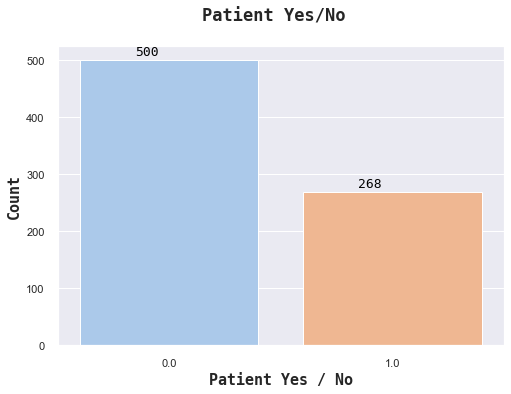

In [22]:
sns.set_theme(style = "darkgrid", color_codes = True)

#draw the count plot
g =sns.countplot(data = df, x  = "Outcome", palette = "pastel")

# start annotating
for p in g.patches:
    g.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 3), 
                   ha = "center", va = "bottom", color = "black", fontname = "monospace", fontsize = 13)


# labels
g.set_xlabel("Patient Yes / No", weight = "semibold", fontname = "monospace", fontsize = 15)
g.set_ylabel("Count", weight = "semibold", fontname = "monospace", fontsize = 15)


plt.suptitle("Patient Yes/No", weight = "bold", fontname = "monospace", fontsize = 17)
plt.show()

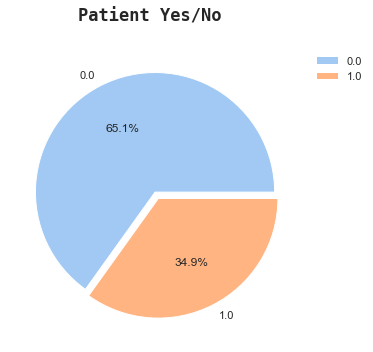

In [23]:
sns.set_theme(style = "darkgrid", color_codes = True)

x = df["Outcome"].value_counts().index
y = df["Outcome"].value_counts().values.tolist()
pal = sns.color_palette("pastel", len(x))
#draw the count plot
plt.pie(y, labels = x, colors = pal, autopct = "%1.1f%%",
        explode = [0.03 for i in x])

# legend
plt.legend(bbox_to_anchor = (1, 1))
plt.suptitle("Patient Yes/No", weight = "bold", fontname = "monospace", fontsize = 17)
plt.show()

The data is imbalanced..

## Pregnancies Column

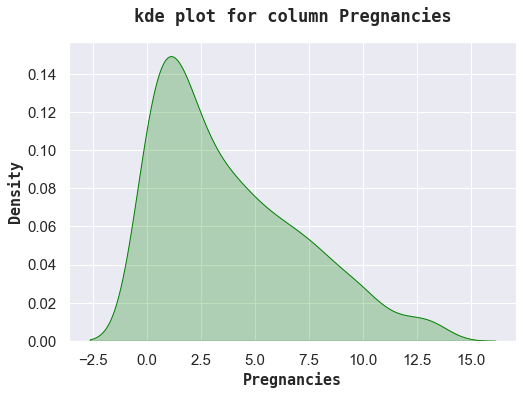

In [24]:
plot_kde(df, "Pregnancies")

As we can see, most people have pregnancies between 0 - 3

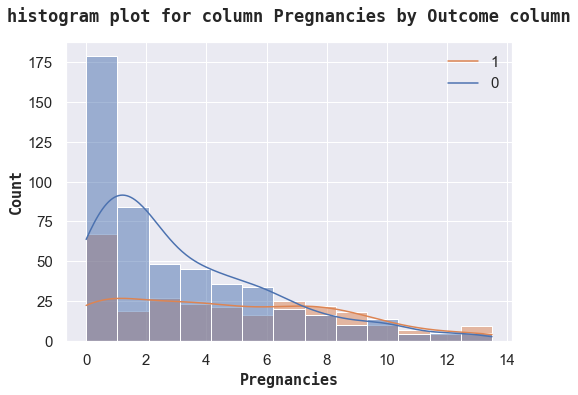

In [25]:
plot_hist_with_outcome(df, "Pregnancies")

> Insights:
> - People who have the disease have a sort of  uniform distribution for the number of pregnancies
> - People who don't have the disease are mostly pople who have only 0 - 3 pregnancies
> - When the number of pregnancies increases, the probability that you have the disease increases.

## Glucose Column

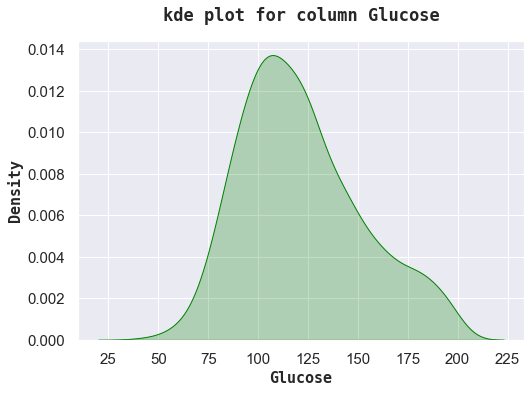

In [26]:
plot_kde(df, "Glucose")

We can see that Glucose is normally distributed and most people have Glucose that ranges from 100 to 125.

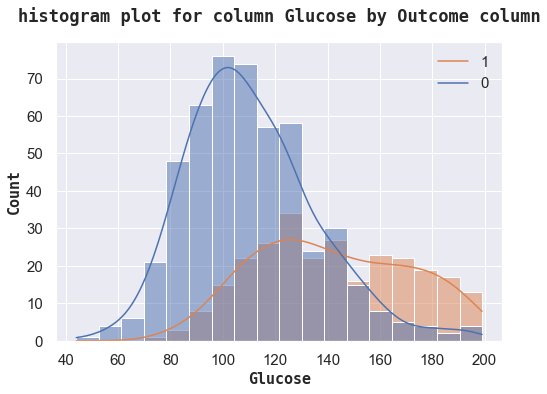

In [27]:
plot_hist_with_outcome(df, "Glucose")

>Insights
>- People who haven't got the disease has a Glucose that is about 100.
>- Most of the people who have got the disease has a Glucost that is greater that 100<br>
>- When your Glucose increases, the probability that you have the disease increases.

## Blood Pressure columns

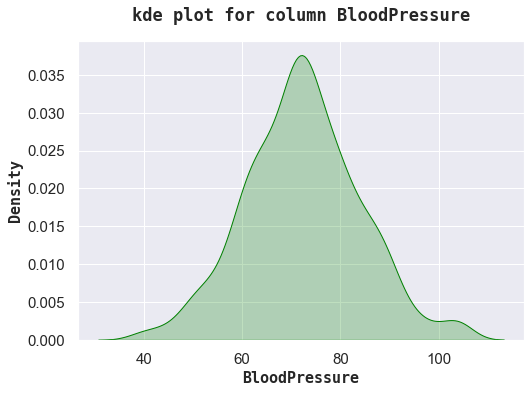

In [28]:
plot_kde(df, "BloodPressure")

Most People have blood pressure about 70.

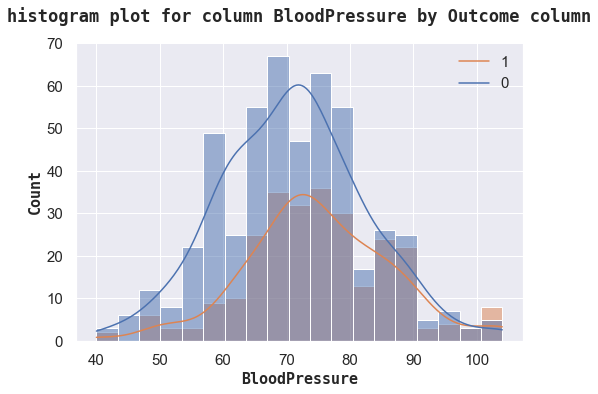

In [29]:
plot_hist_with_outcome(df, "BloodPressure")

>Insights
>- The distributions are very similiar.
>- Both have Blood Pressure that is about 70.

## Skin Thickness column

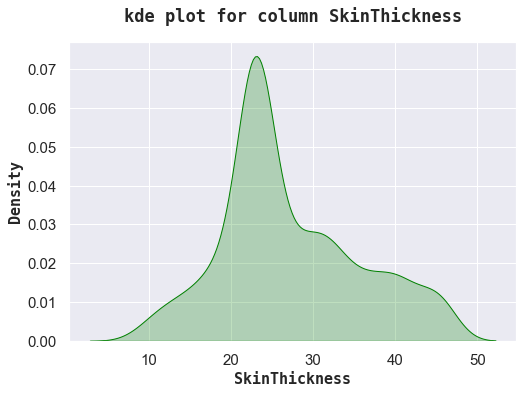

In [30]:
plot_kde(df, "SkinThickness")

Most People have skin thickness about 25.

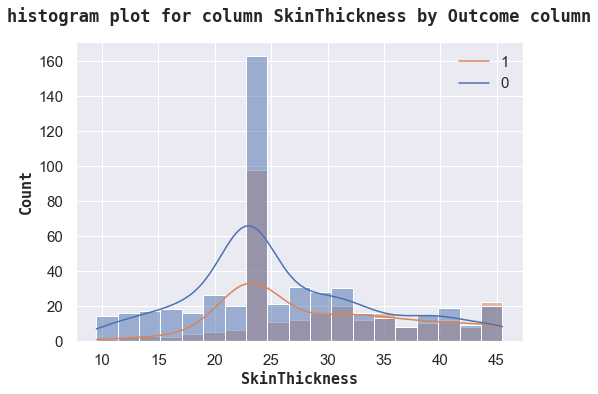

In [31]:
plot_hist_with_outcome(df, "SkinThickness")

>Insights:
>- The distributions are about the same.

## Insulin columns

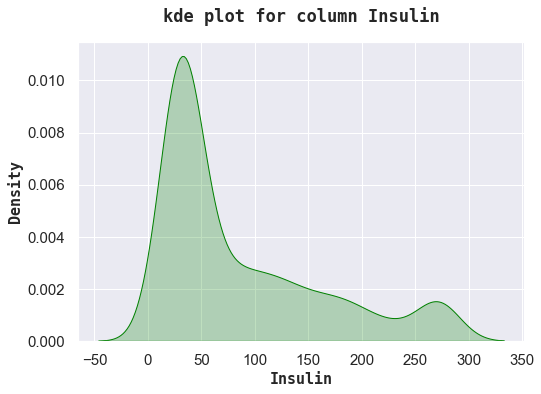

In [32]:
plot_kde(df, "Insulin")

Most People have Insulin measure thats about 0 to 70.

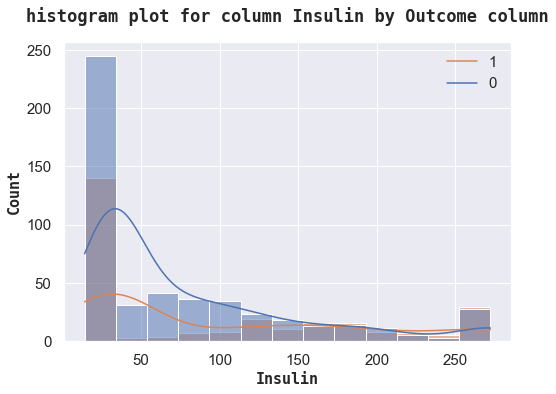

In [33]:
plot_hist_with_outcome(df, "Insulin")

> Insights:
>- There doesn't seem to be a big difference between the two distributions.
>- Both people who have and haven't the disease have Insulin mostly in the range 0 - 50.

## BMI column 

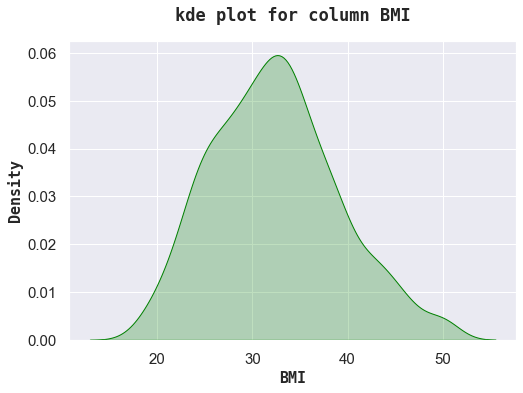

In [34]:
plot_kde(df, "BMI")

Most people have BMI about 35.

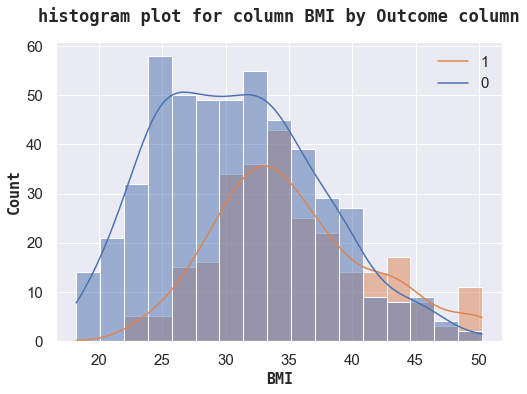

In [35]:
plot_hist_with_outcome(df, "BMI")

> Insights:
>- Most people who have the disease have a Higher BMI that people who haven't the disease.

## Diabetes Pedigree function column

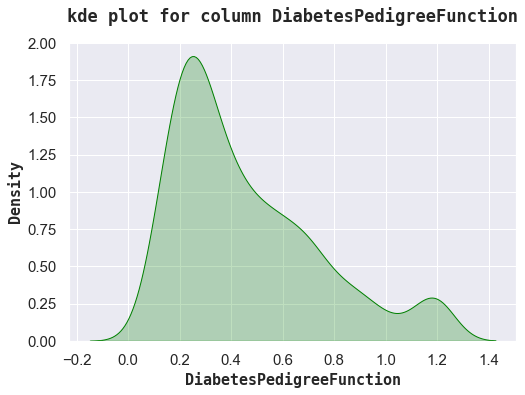

In [36]:
plot_kde(df, "DiabetesPedigreeFunction")

The most common value for this column is about 0.3 .

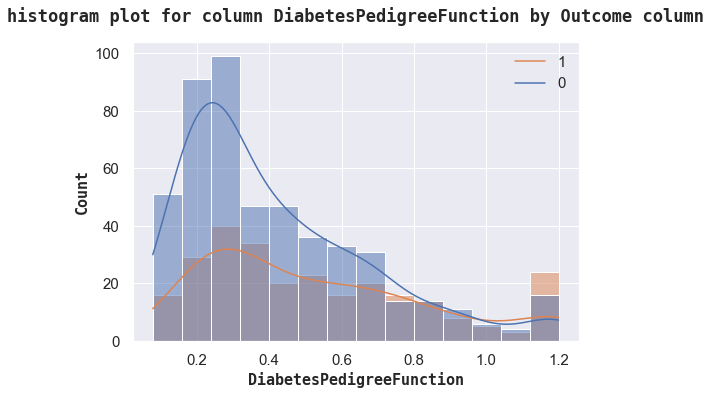

In [37]:
plot_hist_with_outcome(df, "DiabetesPedigreeFunction")

>Doesn't seem to have much difference between people who have and haven't the disease.

## Age Column

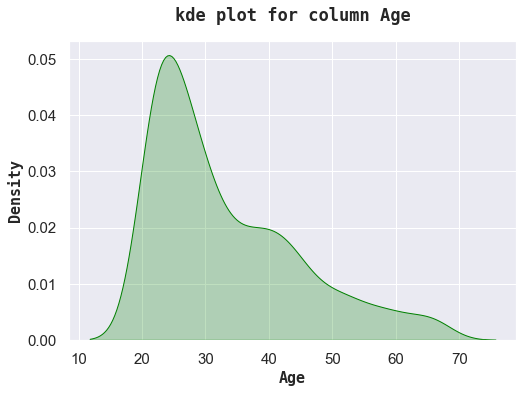

In [38]:
plot_kde(df, "Age")

> Most people that have the test are about 20 - 30 years
> seems to have no people younger thab 20 had the test

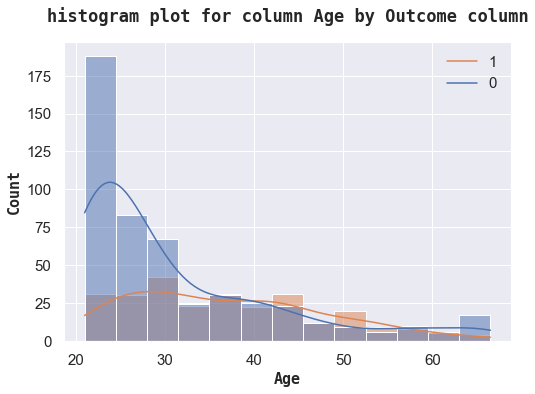

In [39]:
plot_hist_with_outcome(df, "Age")

> Insights:<br>
> People who are between 20-30 are more likely to be safe.

<h1 style = "color: #35454F">Modleing</h1>

In [40]:
# tools
from sklearn.model_selection import train_test_split # to split the data as obvious
from sklearn.preprocessing import StandardScaler # to scale our features
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix,\
roc_curve
from sklearn.model_selection import cross_val_predict

In [41]:
# X = df[['Pregnancies', 'Glucose', 'BMI', 'Age']]
X = df.drop("Outcome", axis  =1)
y = df["Outcome"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label= label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15, weight = "semibold")
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17, weight = "bold")
    plt.axis([0, 1, 0, 1])
    plt.show()

In [45]:
models, auc_scores = [], [] 

<h3 style = "color: #35454F">Logistic Regression</h3>

In [46]:
log_reg_clf = LogisticRegression(random_state = 42, max_iter = 500)
log_reg_pred = cross_val_predict(log_reg_clf, X_train, y_train, cv = 5)

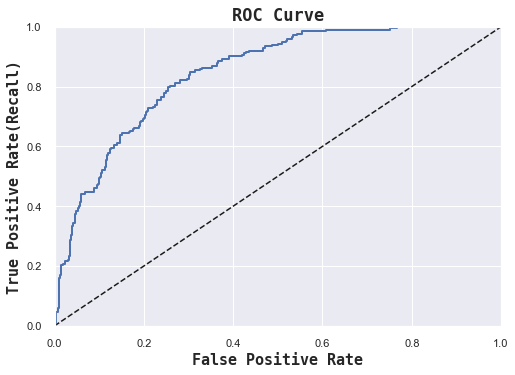

In [47]:
log_reg_scores = cross_val_predict(log_reg_clf, X_train, y_train, cv = 3, method = "decision_function")
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_train, log_reg_scores)
plot_roc_curve(log_reg_fpr, log_reg_tpr)

In [48]:
log_reg_auc = roc_auc_score(y_train, log_reg_scores)
log_reg_auc

0.8464402374345825

I wil try to fine-tune it with grid search

In [49]:
log_reg_param_grid = [
    {
        "C": [0.25, 0.5, 1, 2, 3]
    }
]

In [50]:
log_reg_grid_search = GridSearchCV(log_reg_clf, log_reg_param_grid,
                                   cv = 3, scoring = "roc_auc",
                                   return_train_score = True)
log_reg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 3]}], return_train_score=True,
             scoring='roc_auc')

In [51]:
log_reg_grid_search.best_estimator_

LogisticRegression(C=2, max_iter=500, random_state=42)

In [52]:
log_reg_grid_search.best_score_

0.8473024583742307

In [53]:
models.append("Logistic Regression")
auc_scores.append(log_reg_grid_search.best_score_)

The default parameters are the best here.

<h3 style = "color: #35454F">SGDClassifier</h3>

In [54]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)

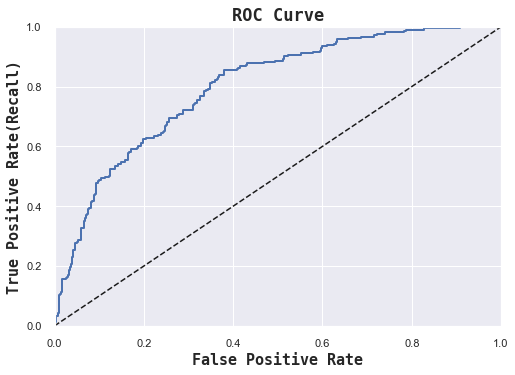

In [55]:
sgd_clf_scores = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = "decision_function")
sgd_clf_fpr, sgd_clf_tpr, _ = roc_curve(y_train, sgd_clf_scores)
plot_roc_curve(sgd_clf_fpr, sgd_clf_tpr)

In [56]:
sgd_auc = roc_auc_score(y_train, sgd_clf_scores)
sgd_auc

0.799257724234016

In [57]:
models.append("SGD Classifier")
auc_scores.append(sgd_auc)

<h3 style = "color: #35454F">SVC</h3>

In [58]:
svm_clf = SVC(random_state = 42)
svm_clf_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 5)

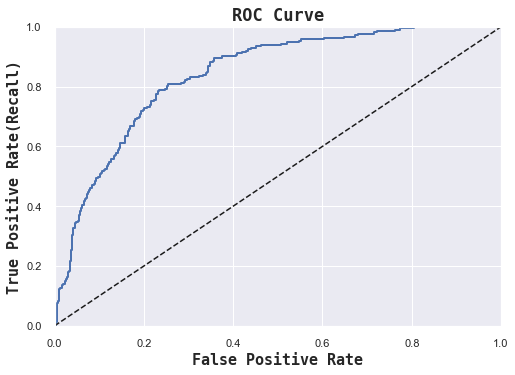

In [59]:
svm_clf_scores = cross_val_predict(svm_clf, X_train, y_train, cv = 5, method = "decision_function")
svm_fpr, svm_tpr, _ = roc_curve(y_train, svm_clf_scores)
plot_roc_curve(svm_fpr, svm_tpr)

In [60]:
svm_clf_auc = roc_auc_score(y_train, svm_clf_scores)
svm_clf_auc

0.8399892288059194

I will use grid search to better hypertune the model

In [61]:
svm_param_grid = {
    "kernel": ["rbf", "linear"],
    "C":[1, 5, 10, 20]
}

In [62]:
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv = 5,
                               scoring = "roc_auc",
                               return_train_score = True)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [63]:
svm_grid_search.best_estimator_

SVC(C=20, kernel='linear', random_state=42)

In [64]:
svm_grid_search.best_score_

0.8423829177091451

In [65]:
models.append("svm")
auc_scores.append(svm_grid_search.best_score_)

In [66]:
svm_grid_search.best_estimator_.fit(X_train, y_train)
y_pred = svm_grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)


0.7662337662337663

In [67]:
roc_auc_score(y_test, y_pred)

0.7333333333333334

A little better but not very much..

<h3 style = "color: #35454F">Random Forest Classifier</h3>

In [68]:
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf_pred = cross_val_predict(forest_clf, X_train, y_train, cv = 5)

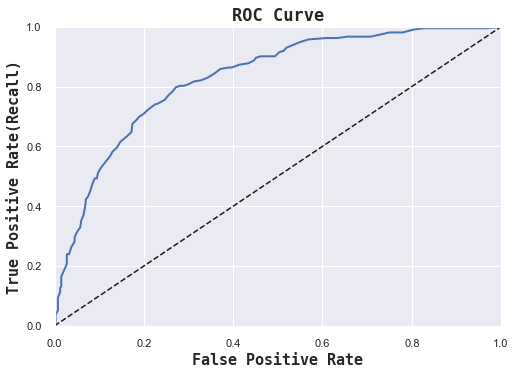

In [69]:
forest_clf_probas = cross_val_predict(forest_clf, X_train, y_train, cv = 5,
                                      method = "predict_proba")
forest_clf_scores = forest_clf_probas[:, 1]
forest_fpr, forest_tpr, _ = roc_curve(y_train, forest_clf_scores)
plot_roc_curve(forest_fpr, forest_tpr)

In [70]:
forest_auc_score = roc_auc_score(y_train, forest_clf_scores)
forest_auc_score

0.8293877981103579

Time to better tune the model..

In [71]:
forest_param_grid = [
    {
    'n_estimators': [200,2000],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3]
    }
]

In [72]:
forest_grid_search = GridSearchCV(forest_clf, forest_param_grid, cv = 5,
                                  scoring = "roc_auc",
                                  return_train_score = True)
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [80, 90, 100, 110],
                          'max_features': [2, 3],
                          'n_estimators': [200, 2000]}],
             return_train_score=True, scoring='roc_auc')

In [73]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=3, n_estimators=2000,
                       random_state=42)

In [74]:
forest_grid_search.best_score_

0.8348334768877403

In [75]:
models.append("Random Forest")
auc_scores.append(forest_grid_search.best_score_)

<h2 style = "color: #35454F">Best model</h2>

In [76]:
models

['Logistic Regression', 'SGD Classifier', 'svm', 'Random Forest']

In [77]:
models = pd.DataFrame({"model_name":models, "auc_score": auc_scores})

In [78]:
models.sort_values("auc_score", ascending = False)

,model_name,auc_score
0,Logistic Regression,0.847302
2,svm,0.842383
3,Random Forest,0.834833
1,SGD Classifier,0.799258


As we can see the best model is logistic Regression.

<h2 style = "color: #35454F">Evaluating the model</h2>

In [79]:
best_model = log_reg_grid_search.best_estimator_

In [80]:
best_model.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=500, random_state=42)

In [81]:
y_pred = best_model.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [83]:
roc_auc_score(y_test, y_pred)

0.7515151515151515